In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0,'../..')
from os import remove

In [3]:
#from pybandstructure.sample import *
#from pybandstructure.operators import *
#from pybandstructure.band_structure import *

In [4]:
from pybandstructure import *

In [5]:
basis_vector = 4*np.pi/3*np.array([[1,0.5],[0,np.sqrt(3)*0.5]])
k_sample = Unit_Cell_Sample.irreducible_sample(name = '2D_Hexagonal_D6',basis_vectors=basis_vector,denominator = 18)
q_sample = Unit_Cell_Sample.wigner_seitz_cell(basis_vectors=basis_vector, denominator=18, special_points=None)
G_sample = Sample.lattice_sample(basis_vectors=basis_vector, cut_off=5, special_points=None)

In [6]:
def f(k, a0 = 1):
    return (np.exp(1j * k[0] * a0) + 2 * np.exp(-1j * k[0] * a0/2) * np.cos(np.sqrt(3)/2 * a0 * k[1]))

def fx(k, a0 = 1):
    return (1j * a0 * np.exp(1j * k[0] * a0) -1j * a0 * np.exp(-1j * k[0] * a0/2) * np.cos(np.sqrt(3)/2 * a0 * k[1]))

def fy(k, a0 = 1):
    return (-  np.sqrt(3) * a0 * np.exp(-1j * k[0] * a0/2) * np.sin(np.sqrt(3)/2 * a0 * k[1]))
sigma_x = np.array([[0.,  1.],
                    [1.,  0.]], dtype = complex)
sigma_y = np.array([[0.,-1.j],
                    [1.j, 0.]], dtype = complex)

sigma_0 = np.array([[1.,0],
                    [0, 1.]], dtype = complex)
hamiltonian_matrices = [sigma_x, sigma_y]
hamiltonian_functions = [lambda k: np.real(f(k)), lambda k: -np.imag(f(k))]
H = Momentum_Conserving_Operator(matrices = hamiltonian_matrices, 
                                           coefficients = hamiltonian_functions, 
                                           collapse = True)


Px = Momentum_Conserving_Operator(matrices = hamiltonian_matrices,
                                           coefficients = [lambda k: np.real(fx(k)), lambda k: -np.imag(fx(k))])
Py = Momentum_Conserving_Operator(matrices = hamiltonian_matrices,
                                           coefficients = [lambda k: np.real(fy(k)), lambda k: -np.imag(fy(k))])
#Density operator G=0
density_operator = [Operator(matrices=[sigma_0], coefficients=[lambda k,q: 1], collapse=True, hermitian=False)]

In [7]:
BS = Band_Structure.from_hamiltonian(q_sample=q_sample, G_sample=G_sample,hamiltonian = H, momentum_operator = [Px, Py], density_operator=density_operator, k_sample = k_sample, zero_filling = 1, degeneracy = 2)

In [8]:
f_name = '../test_output/test_band_structure.hdf5'
try:
    remove(f_name)
except:
    pass
BS.compute_bands(eigvals=(0,1))


100%|██████████| 37/37 [00:00<00:00, 5176.94it/s]


In [9]:
BS.chemical_potential

0.0

In [10]:
BS.wavefunctions.shape

(2, 2, 37)

In [11]:
f_name = '../test_output/test_band_structure.hdf5'
try:
    remove(f_name)
except:
    pass
BS.save(file_name = f_name, band_structure_name='bands')

In [12]:
G_denominator= np.ones(len(G_sample.denominator), dtype=int)
print(np.ones(len(G_sample.denominator), dtype=int))
print(G_sample.denominator)
try:
    assert np.allclose(G_sample.denominator, G_denominator)
except:
    print("false")

[1 1]
[1 1]


In [13]:
BS2 = Band_Structure.from_file(file_name = f_name, band_structure_name='bands')

In [14]:
np.all(BS2.energies == BS.energies)


True

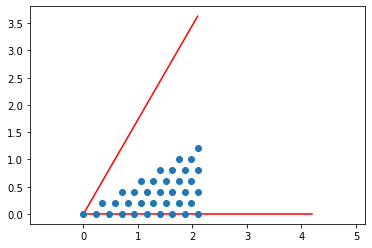

In [15]:
BS2.k_sample.plot()

In [16]:
BS2.zero_filling

1

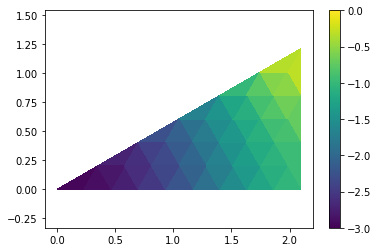

In [17]:
plt.figure()
plt.axis('equal')
plt.tripcolor(BS2.k_sample.coords[:,0],BS2.k_sample.coords[:,1], BS2.energies[0,:],vmin = -3, vmax =0)
plt.colorbar()

In [18]:
BS2.k_sample.coords[:,1].shape

(37,)

In [19]:
 BS2.energies[0,:].shape

(37,)

(0.0, 5.72199383086163)

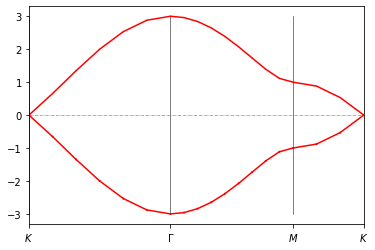

In [20]:
contour = [r'$K$',r'$\Gamma$',r'$M$',r'$K$']
BS2.k_sample.contour(contour)

index, distance, points = BS2.k_sample.contour(contour).values()

for j in range(len(contour)):
    plt.plot([distance[points[j]], distance[points[j]]],[np.amin(BS2.energies),np.amax(BS2.energies)],c='k',lw=0.5)
for i in range(2):
    plt.plot(distance,BS2.energies[i,index],c='r')
    plt.scatter(distance,BS2.energies[i,index], s =  BS2.occupations[i,index]  +0.1, c= 'r')
plt.plot([distance[0], distance[-1]], [BS2.chemical_potential,BS2.chemical_potential],'-.',lw = 0.5)
plt.xticks(distance[points],contour)
plt.xlim([distance[0], distance[-1]])

In [21]:
BS2.density = 0.5


../../pybandstructure/band_structure/band_structure.py:508: UserWarning: changing density without changing band structure
  warn("changing density without changing band structure")


In [22]:
BS2.chemical_potential =0.5
BS2.temperature = 0.5

../../pybandstructure/band_structure/band_structure.py:536: UserWarning: changing chemical potential 
                         without changing band structure
  without changing band structure"""
../../pybandstructure/band_structure/band_structure.py:521: UserWarning: changing temperature without changing band structure
  warn("changing temperature without changing band structure")


In [23]:
x = np.linspace(-3,5)
y = [BS2.compute_density(mu,0.1) for mu in x]

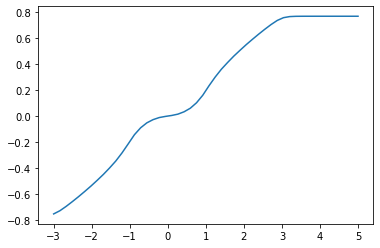

In [24]:
plt.plot(x,y)

In [25]:
x2 = np.linspace(-1,1)
y2 = [BS2.compute_chemical_potential(n,0.1) for n in x2]

../../pybandstructure/band_structure/band_structure.py:914: UserWarning: density value out of range
  warn("density value out of range")


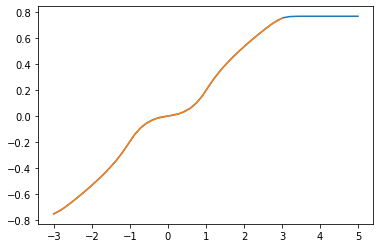

In [26]:
plt.plot(x,y)
plt.plot(y2,x2)

In [27]:
BS2.energies.shape

(2, 37)

In [28]:
from scipy.sparse import find

In [29]:
find( np.kron(np.eye(3),np.eye(2)))

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([1., 1., 1., 1., 1., 1.]))

In [30]:
np.kron(np.eye(3),np.eye(2)).shape

(6, 6)

In [31]:
BS.compute_momentum_matrix()

100%|██████████| 37/37 [00:00<00:00, 4088.77it/s]


In [32]:
BS.compute_density_matrix()

100%|██████████| 37/37 [00:01<00:00, 22.74it/s]

[[[[ 1.00000000e+00+0.00000000e+00j  9.99999930e-01+2.65238357e-04j
     9.99995208e-01+2.18902422e-03j ...  9.99888263e-01+1.05699779e-02j
     9.99992018e-01+2.82528347e-03j  1.00000000e+00+0.00000000e+00j]
   [ 1.00000000e+00+0.00000000e+00j  9.99999930e-01-2.65238357e-04j
     9.99993446e-01+2.56004895e-03j ...  9.99943284e-01+7.53081594e-03j
     9.99996299e-01+1.92378810e-03j  1.00000000e+00+0.00000000e+00j]
   [ 1.00000000e+00+0.00000000e+00j  9.99999595e-01+6.36267118e-04j
     9.99995208e-01-2.18902422e-03j ...  9.99999595e-01+6.36267118e-04j
     9.99995208e-01-2.18902422e-03j  9.99996299e-01-1.92378810e-03j]
   ...
   [ 1.00000000e+00+0.00000000e+00j  9.46816320e-01+2.24399590e-01j
     9.46816320e-01+2.24399590e-01j ...  9.99154079e-01+2.90724145e-02j
     9.99482482e-01+2.27431370e-02j  1.00000000e+00-1.70096036e-16j]
   [ 1.00000000e+00+0.00000000e+00j  9.99999214e-01-8.86761967e-04j
     1.00000000e+00+0.00000000e+00j ...  9.73356457e-01-1.61039325e-01j
     9.74297766e-